In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
 df.shape

(200, 5)

In [5]:
df.rename(columns={'Genre':'Gender'},inplace=True)


In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

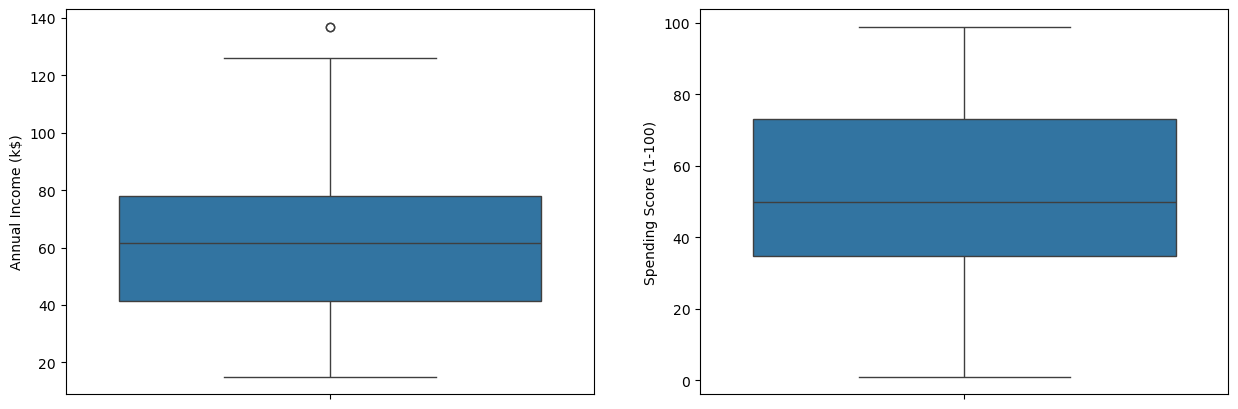

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df,y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df,y="Spending Score (1-100)")

plt.show()

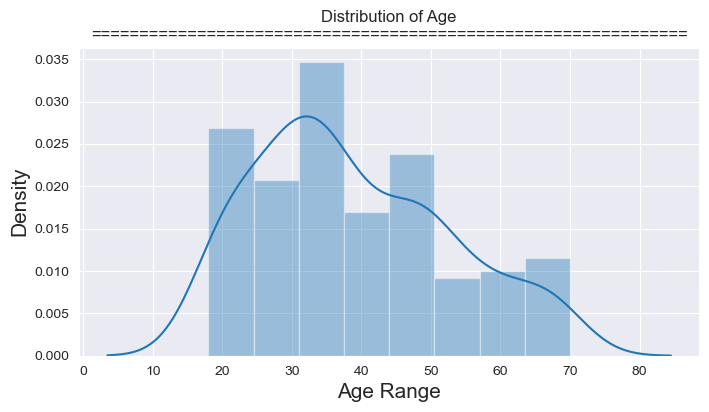

In [11]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')

sns.distplot(df.Age)
plt.title("Distribution of Age\n==============================================================")
plt.xlabel("Age Range",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

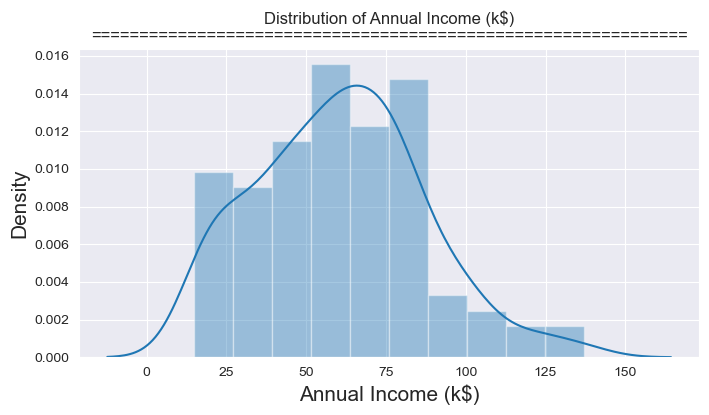

In [12]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')

sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of Annual Income (k$)\n==============================================================")
plt.xlabel("Annual Income (k$)",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

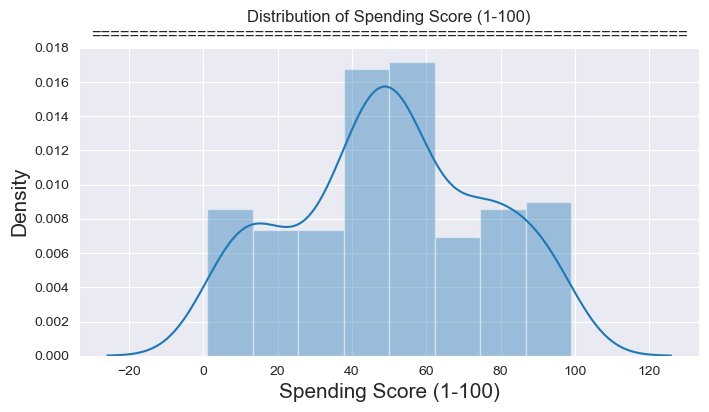

In [13]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')

sns.distplot(df['Spending Score (1-100)'])
plt.title("Distribution of Spending Score (1-100)\n==============================================================")
plt.xlabel("Spending Score (1-100)",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

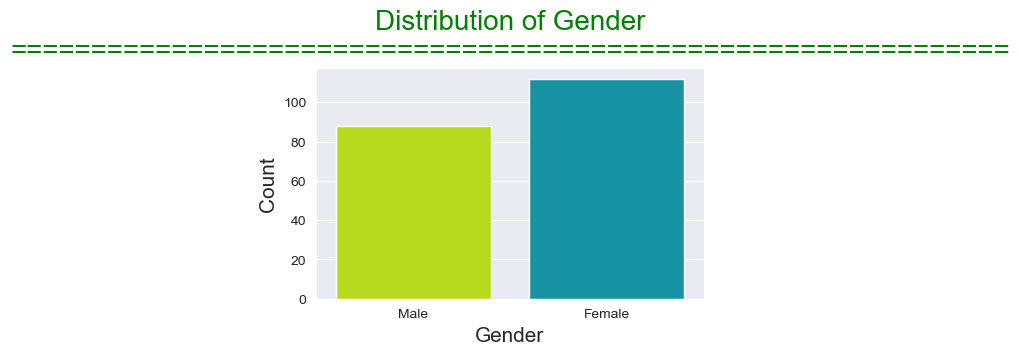

In [14]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')

plt.title("Distribution of Gender\n==============================================================",fontsize=20,color='green')
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(x=df.Gender,palette="nipy_spectral_r")
plt.show()

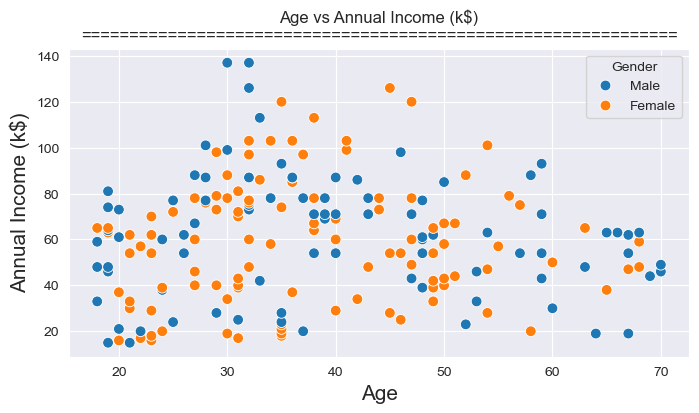

In [15]:
#age vs annual income

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')

sns.scatterplot(data=df,x="Age",y="Annual Income (k$)",hue="Gender",s=60)
plt.title("Age vs Annual Income (k$)\n==============================================================")
plt.xlabel("Age",fontsize=15)
plt.ylabel("Annual Income (k$)",fontsize=15)
plt.show()

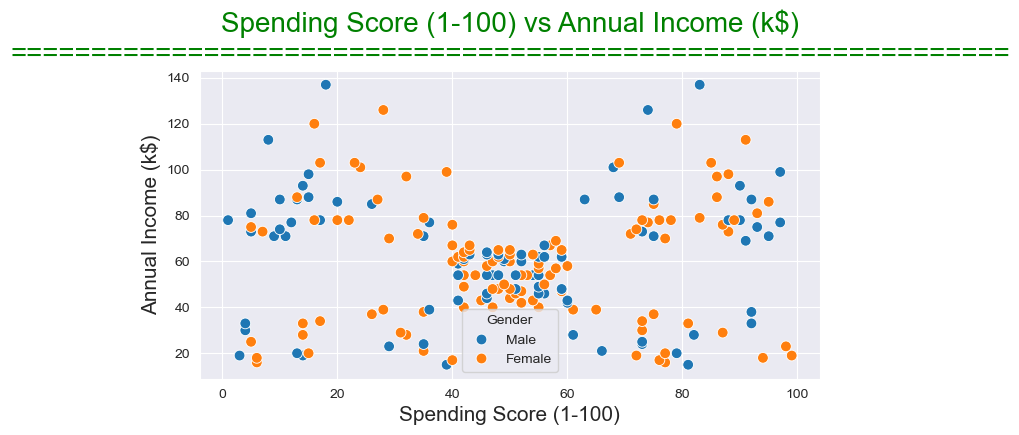

In [16]:
#Spending Score (1-100) vs anuual income
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')

sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)",hue="Gender",s=60)
plt.title("Spending Score (1-100) vs Annual Income (k$)\n==============================================================",fontsize=20,color='green')
plt.xlabel("Spending Score (1-100)",fontsize=15)
plt.ylabel("Annual Income (k$)",fontsize=15)
plt.show()

In [17]:
#Age 

Age_18_25=df.Age[(df.Age>=18)&(df.Age<=25)]
Age_26_35=df.Age[(df.Age>=26)&(df.Age<=35)]
Age_36_45=df.Age[(df.Age>=36)&(df.Age<=45)]
Age_46_55=df.Age[(df.Age>=46)&(df.Age<=55)]
Age_55_Above=df.Age[(df.Age>=56)]

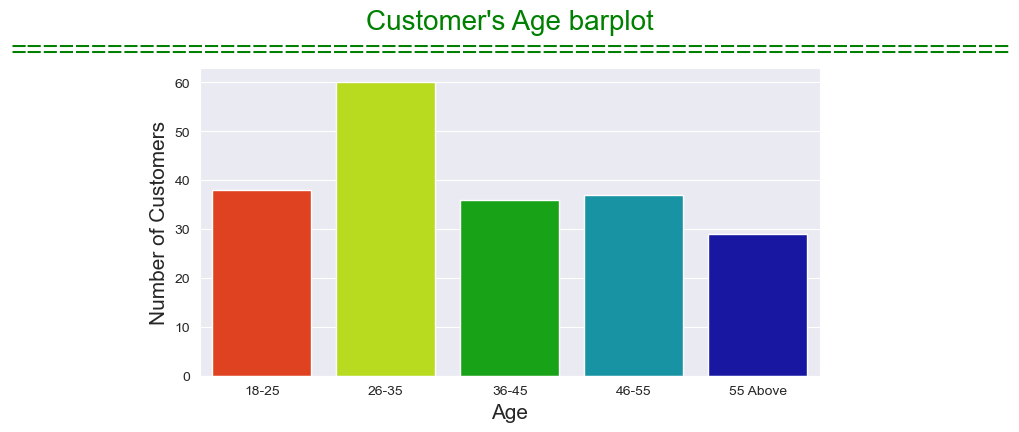

In [18]:
x=["18-25","26-35","36-45","46-55","55 Above"]
y=[len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(8,4))
sns.barplot(x=x,y=y,palette="nipy_spectral_r")
plt.title("Customer's Age barplot\n==============================================================",fontsize=20,color="green")
plt.xlabel("Age",fontsize=15)
plt.ylabel("Number of Customers",fontsize=15)
plt.show()

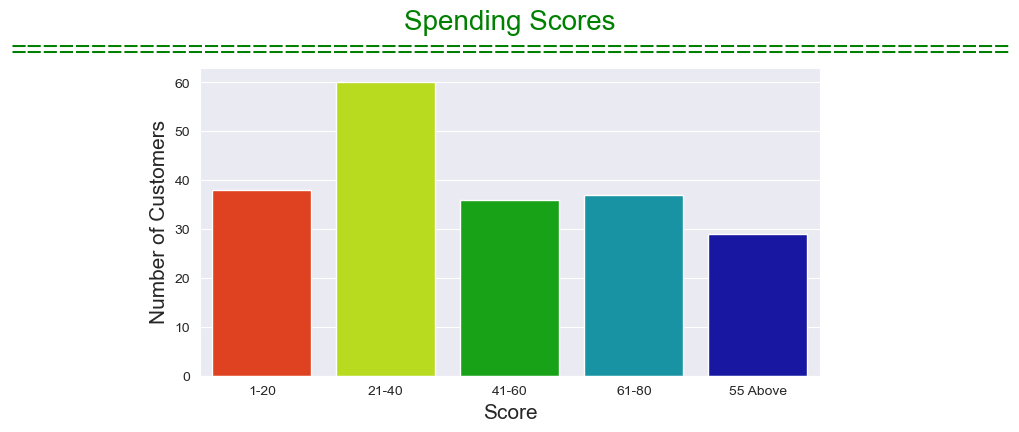

In [19]:
ss1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss2_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss3_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss4_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss5_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]

score_x=["1-20","21-40","41-60","61-80","55 Above"]
score_y=[len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(8,4))
sns.barplot(x=score_x,y=score_y,palette='nipy_spectral_r')
plt.title("Spending Scores\n==============================================================",fontsize=20,color='green')
plt.xlabel("Score",fontsize=15)
plt.ylabel("Number of Customers",fontsize=15)
plt.show()

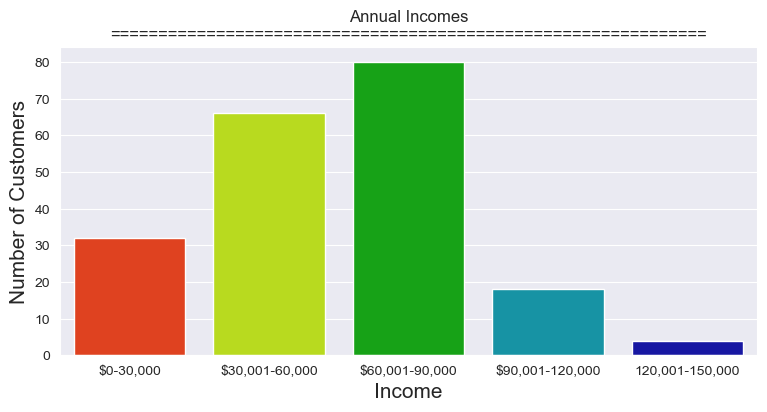

In [20]:
ai_0_30    = df["Annual Income (k$)"][ (df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30) ]
ai_31_60   = df["Annual Income (k$)"][ (df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60) ]
ai_61_90   = df["Annual Income (k$)"][ (df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90) ]
ai_91_120  = df["Annual Income (k$)"][ (df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120) ]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)& (df["Annual Income (k$)"]<=150) ]

income_x=["$0-30,000", "$30,001-60,000", "$60,001-90,000", "$90,001-120,000", "120,001-150,000"]
income_y=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(9,4))
sns.barplot(x=income_x,y=income_y,palette='nipy_spectral_r')
plt.title("Annual Incomes\n==============================================================")
plt.xlabel("Income",fontsize=15)
plt.ylabel("Number of Customers",fontsize=15)
plt.show()


In [21]:
df_scaled=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaler=StandardScaler()
df_scaled_fit=scaler.fit_transform(df_scaled)

In [22]:
df_scaled_fit

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [23]:
df_scaled_fit=pd.DataFrame(df_scaled_fit)
df_scaled_fit

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [24]:
df_scaled_fit.columns=["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [25]:
var_list=df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]
var_list.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [26]:
# k-means with some arbitrary k

kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(var_list)

  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ADMIN\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\subprocess.

KMeans(max_iter=50, n_clusters=4)

In [27]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [28]:
ssd=[]

for num_clusters in range(1,11):
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(var_list)

    ssd.append(kmeans.inertia_)

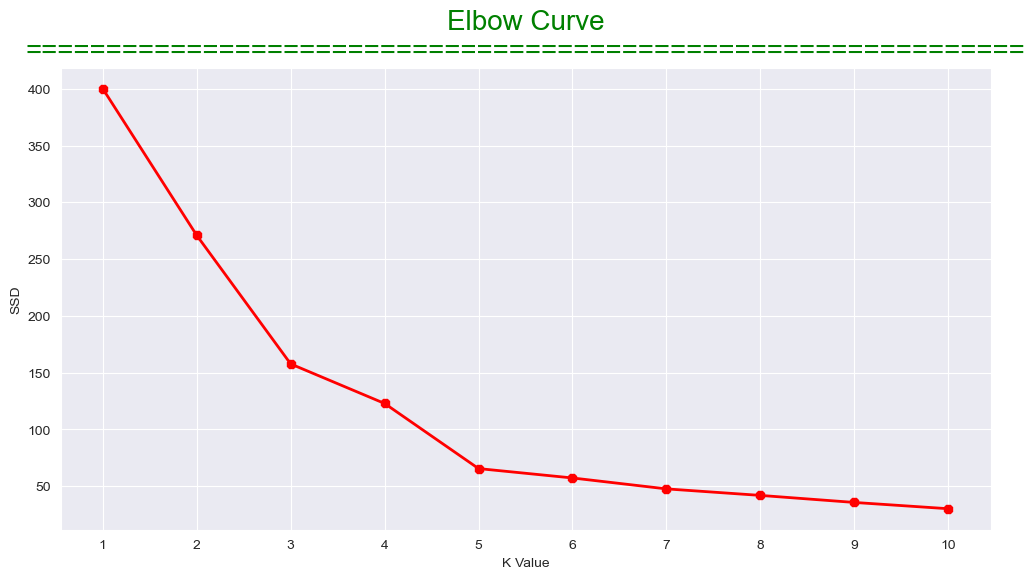

In [29]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11),ssd,linewidth=2,color='red',marker='8')
plt.title("Elbow Curve\n==============================================================",fontsize=20,color='green')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")
plt.show()


In [30]:
#k=5
kmeans=KMeans(n_clusters=5,max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [31]:
kmeans.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [32]:
df['label']=kmeans.labels_

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


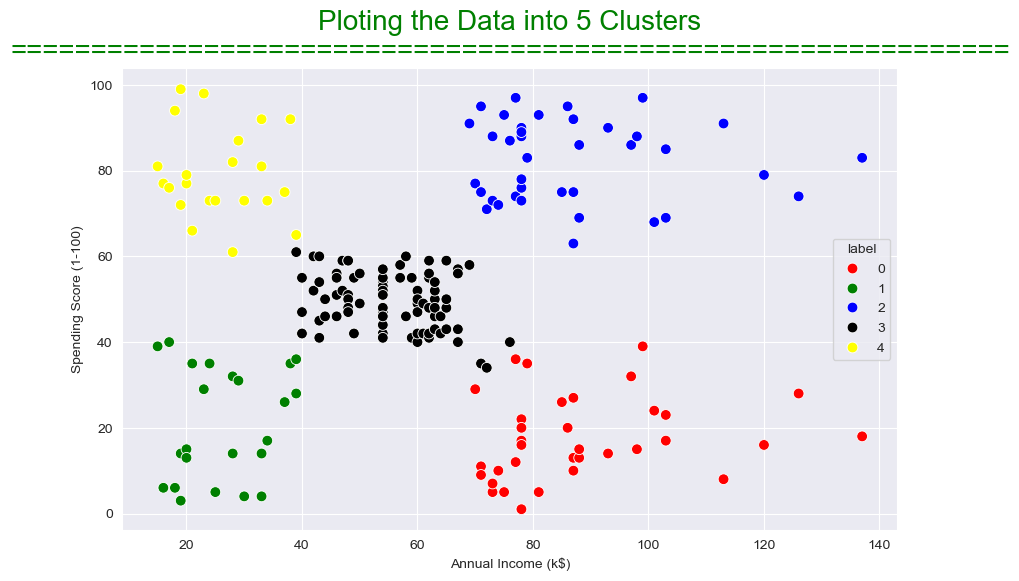

In [34]:
# ScatterPlot when K=5

plt.figure(figsize=(10,6))
plt.title("Ploting the Data into 5 Clusters\n==============================================================",fontsize=20,color='green')
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="label",s=60,palette=['red','green','blue','black','yellow'])
plt.show()

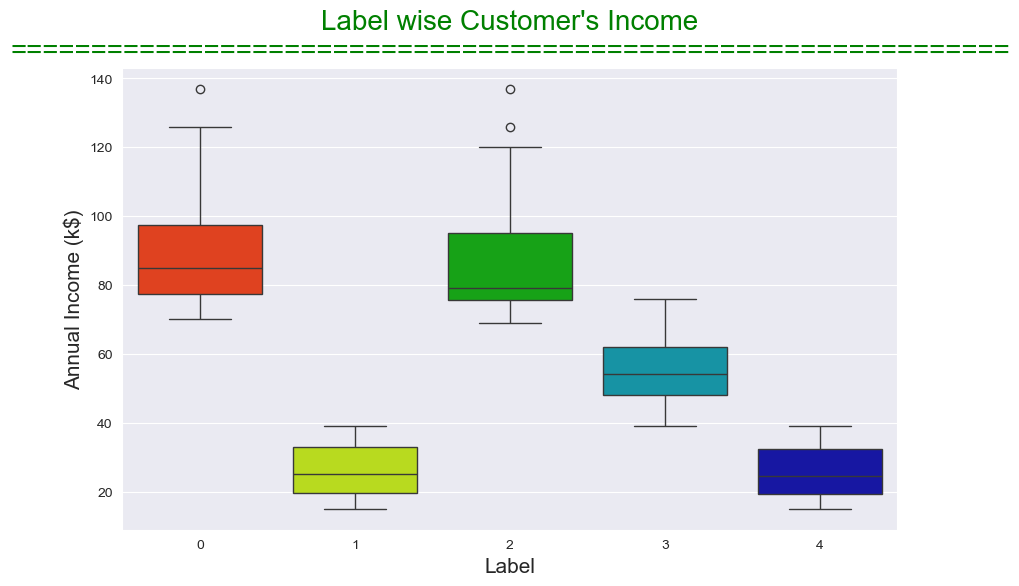

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x="label",y="Annual Income (k$)",data=df,palette='nipy_spectral_r')
plt.title("Label wise Customer's Income\n==============================================================",fontsize=20,color='green')
plt.xlabel("Label",fontsize=15)
plt.ylabel("Annual Income (k$)",fontsize=15)
plt.show()


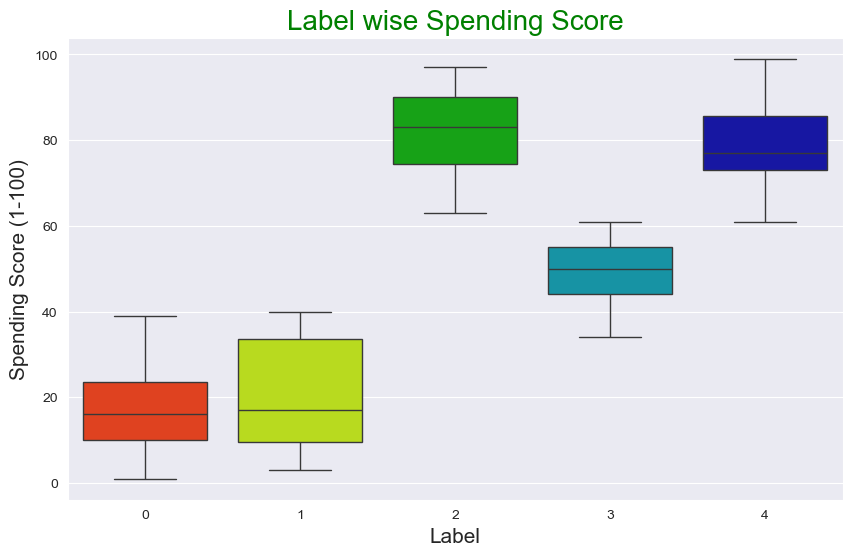

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label',y='Spending Score (1-100)',data=df,palette='nipy_spectral_r')
plt.title("Label wise Spending Score",fontsize=20,color='green')
plt.xlabel('Label',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.show()

In [37]:
df['label'].unique()

array([1, 4, 3, 2, 0], dtype=int32)

In [38]:
cust1=df[df.label==0]
print("Number of customers in 1st group : ",len(cust1))
print("The customer ID are : ",cust1.CustomerID.values)
print("=====================================================================================\n")

cust2=df[df.label==1]
print("Number of customers in 2nd group : ",len(cust2))
print("The customer ID are : ",cust2.CustomerID.values)
print("=====================================================================================\n")

cust3=df[df.label==2]
print("Number of customers in 3rd group : ",len(cust3))
print("The customer ID are : ",cust3.CustomerID.values)
print("=====================================================================================\n")

cust4=df[df.label==3]
print("Number of customers in 4th group : ",len(cust4))
print("The customer ID are : ",cust4.CustomerID.values)
print("=====================================================================================\n")

cust5=df[df.label==4]
print("Number of customers in 5th group : ",len(cust5))
print("The customer ID are : ",cust5.CustomerID.values)
print("=====================================================================================\n")


Number of customers in 1st group :  35
The customer ID are :  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Number of customers in 2nd group :  23
The customer ID are :  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Number of customers in 3rd group :  39
The customer ID are :  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Number of customers in 4th group :  81
The customer ID are :  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

Number of customers in 5th group :  22
The c

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


In [40]:
var_list1=pd.DataFrame(df_scaled_fit,columns=["Age","Annual Income (k$)","Spending Score (1-100)"])

In [41]:
var_list1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [42]:
#model fitting

kmeans1=KMeans(n_clusters=5,max_iter=50)
kmeans1.fit(var_list1)

KMeans(max_iter=50, n_clusters=5)

In [43]:
kmeans.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [44]:
df['label']=kmeans1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [45]:
ssd=[]
for num_clusters in range(1,11):
    kmeans1=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans1.fit(var_list1)

    ssd.append(kmeans1.inertia_)

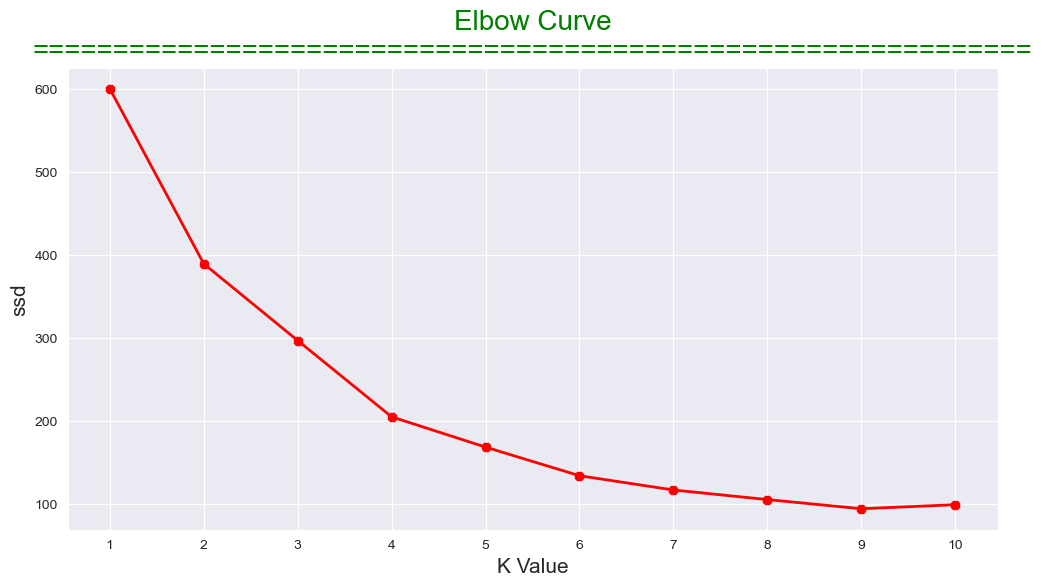

In [48]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),ssd,linewidth=2,color='red',marker='8')
plt.title("Elbow Curve\n==============================================================",fontsize=20,color='green')
plt.xlabel("K Value",fontsize=15)
plt.xticks(np.arange(1,11,1))
plt.ylabel("ssd",fontsize=15)
plt.show()

In [49]:
from mpl_toolkits.mplot3d import Axes3D

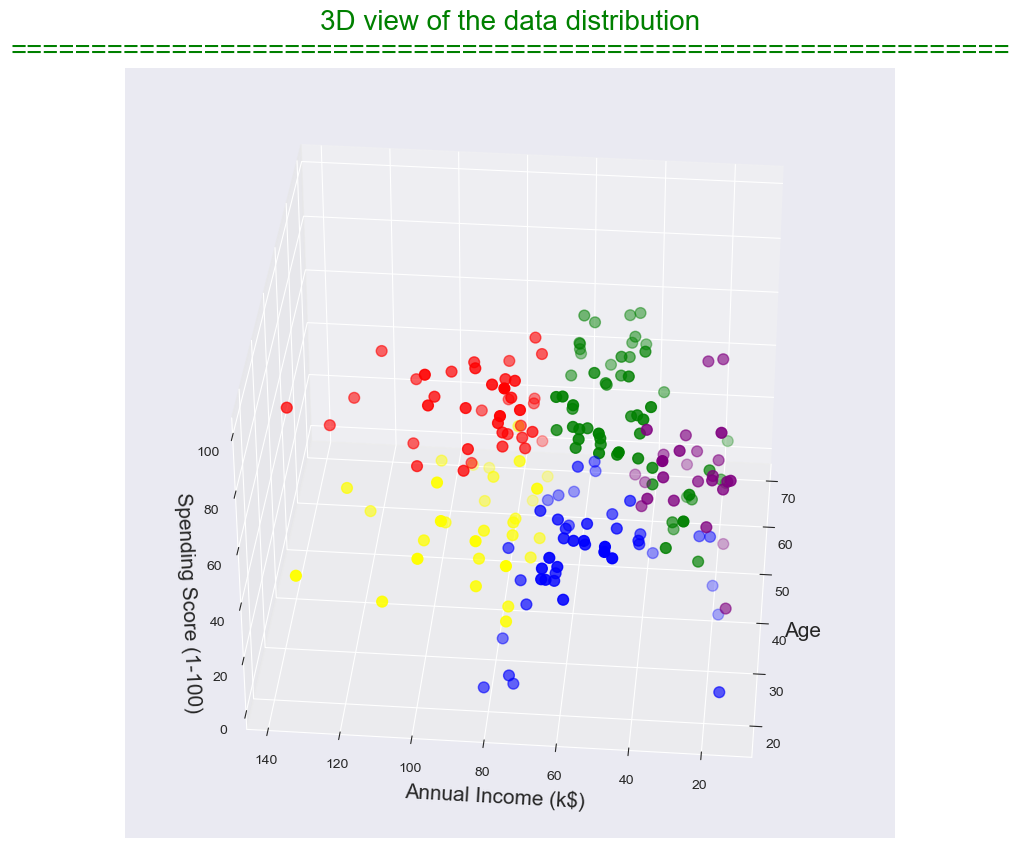

In [52]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c='purple',s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c='blue',s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c='green',s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c='yellow',s=60)
ax.view_init(35,185)
plt.title("3D view of the data distribution\n==============================================================",fontsize=20,color='green')
plt.xlabel("Age",fontsize=15)
plt.ylabel("Annual Income (k$)",fontsize=15)
ax.set_zlabel("Spending Score (1-100)",fontsize=15)
plt.show()

In [54]:
# Printing the customerID according to the groups.


cust1=df[df.label==0]
print("The nimber of customers in 1st group : ",len(cust1))
print("Customer Id are : ",cust1.CustomerID.values)
print("============================================================================================\n")

cust2=df[df.label==1]
print("The nimber of customers in 2nd group : ",len(cust2))
print("Customer Id are : ",cust2.CustomerID.values)
print("============================================================================================\n")

cust3=df[df.label==2]
print("The nimber of customers in 3rd group : ",len(cust3))
print("Customer Id are : ",cust3.CustomerID.values)
print("============================================================================================\n")

cust4=df[df.label==3]
print("The nimber of customers in 4th group : ",len(cust4))
print("Customer Id are : ",cust4.CustomerID.values)
print("============================================================================================\n")

cust5=df[df.label==4]
print("The nimber of customers in 5th group : ",len(cust5))
print("Customer Id are : ",cust5.CustomerID.values)
print("============================================================================================\n")


The nimber of customers in 1st group :  26
Customer Id are :  [ 1  2  4  5  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44
 46 52]

The nimber of customers in 2nd group :  40
Customer Id are :  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]

The nimber of customers in 3rd group :  45
Customer Id are :  [  3   7  15  17  21  39  48  49  50  53  59  62  66  69  70  76  78  79
  82  85  88  89  92  94  95  96  98 100 101 104 106 112 113 114 115 116
 121 122 125 133 135 139 143 145 163]

The nimber of customers in 4th group :  58
Customer Id are :  [  9  11  13  19  23  25  27  29  31  33  35  37  41  43  45  47  51  54
  55  56  57  58  60  61  63  64  65  67  68  71  72  73  74  75  77  80
  81  83  84  86  87  90  91  93  97  99 102 103 105 107 108 109 110 111
 117 118 119 120]

The nimber of customers in 5th group :  31
Customer Id are :  [127 129 131 137 141